# STEP 1 - Import Necessary Labs

In [325]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 
import io 

In [326]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,mean_squared_error 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# STEP 2 - Import The Data

1) Load the data all sheets 

In [327]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\practicedata.csv')

2)Decide which Sheet to Use

2) Print first row or info (check if need for adjusting first Column)

In [328]:
data.head(1)

,Unnamed: 0,Delete This Column,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


3) Fix the Column Names with spaces

In [329]:
data.columns = data.columns.str.replace(' ', '')

4) Rename Column Name 

#=> One Column

In [330]:
data.rename(columns = {'DeleteThisColumn': 'Delete'}, inplace=True)
data.head(1)

,Unnamed:0,Delete,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


#=> Multiple Column

In [331]:
data.columns = ['Mistake', 'Delete', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
data.head(1)

,Mistake,Delete,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


#=> All Column

4) Align columns items to either the right or Left

5) If Necessary, Split Columns

# STEP 3 - Conduct Data Cleaning

1) Find missing values by Percentage

In [332]:
mis = data.isnull().sum() * 100/len(data)
mis.sort_values(ascending=False)


ALP         2.926829
CHOL        1.626016
ALB         0.162602
ALT         0.162602
PROT        0.162602
Mistake     0.000000
Delete      0.000000
Category    0.000000
Age         0.000000
Sex         0.000000
AST         0.000000
BIL         0.000000
CHE         0.000000
CREA        0.000000
GGT         0.000000
dtype: float64

2) Drop Unnecessary Columns (missing by a lot)

In [333]:
data.drop(columns='Mistake', inplace=True)


In [334]:
data = data.drop(data.columns[[0]], axis=1)

In [335]:
data.head(1)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


2) Find Any Unique Values and Remove them

In [336]:
# for col in data:
#     print(data[col].unique())

In [337]:
for col in data.columns:
    print('{}: {}'.format(col, data[col].unique()))

Category: ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
Age: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 76 77 74 19 23 25 27 29 30
 75]
Sex: ['m' 'f']
ALB: [38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 44.3 46.4 36.3 39.  38.7
 41.8 40.9 45.2 36.6 42.  46.7 42.7 43.4 40.5 44.8 42.6 29.  44.6 46.8
 46.1 43.6 37.5 42.1 44.7 41.5 48.7 47.3 44.5 47.4 51.  27.8 45.5 41.7
 45.9 53.  47.8 48.9 31.4 42.9 44.  47.9 38.6 51.2 41.9 50.4 33.9 40.8
 48.1 39.9 41.2 48.4 38.3 45.1 38.8 47.  43.9 36.  45.7 45.8 41.4 45.
 39.1 45.4 42.3 40.2 53.3 37.4 45.3 44.1 37.8 38.1 46.2 37.  39.7 54.4
 48.6 39.4 42.8 44.4 38.4 35.5 46.5 36.2 40.3 35.7 37.9 47.7 49.1 43.
 49.7 37.3 51.8 49.5 48.  48.3 36.7 55.4 42.5 38.2 43.1 46.  40.  46.6
 43.5 43.8 38.  36.8 47.2 50.8 82.2 39.3 37.2 40.7 41.  49.  49.2 47.6
 28.1 59.7 43.3 41.3 39.8 40.4 41.1 34.3 38.9 39.6 39.5 40.1 35.1 34.8
 40.6 32.6 29.2 52.2 

3) Impute or fill missing values

=> using fillna

In [338]:
data['ALB'].fillna(method='ffill', inplace=True)
data['ALP'].fillna(method='bfill', inplace=True)

=> using mean or mode

In [339]:
alt_mean = data['ALT'].mean()
data['ALT'].fillna(value=alt_mean, inplace=True)

=> using specific value

In [340]:
data['ALP'].fillna(60, inplace=True)

=> using Simple Imputer Function

In [341]:
#hcv[['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']] = mean_imp.fit_transform(hcv[['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']])

mean_impu = SimpleImputer(missing_values=np.NaN, strategy='mean')
data['CHOL'] = mean_impu.fit_transform(data[['CHOL']])

mode_impu = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data.PROT = mode_impu.fit_transform(data[['PROT']])

4) Find any duplicate Columns

In [342]:
data.duplicated().sum()

0

5) Show the Duplicated Columns

6) Drop All duplicated, or first, or Last

7) Find Any Unique Values and Remove them

7) Ensure the data is in the correct data type

8) Save the Data Type

# STEP 4 - Exploratory Data Analysis

1) Run and Interpret the describe function

In [343]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.615935,68.421138,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.043902
std,10.055105,5.776886,26.747609,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.400000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.900000,66.000000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.350000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


2) Assign x(features) or y(target)

In [344]:
X = data.drop(columns=['Category'])
y= data['Category']


3) Based on data type and desired analysis, begin data visualization. For Data Visualization run and interpret:

# => ScatterPlot

In [345]:
fig = px.scatter_matrix(data,
    dimensions=list(data.drop(columns="Category").columns),
    color="Category")
fig.show()

# => Run a correlation for target value

In [346]:
##Scatter matrix on CHE, CHOL only 
fig = px.scatter_matrix(data,      
    dimensions=['CHE', 'CHOL'],
    color='Category')
fig.show()

# => Show correlation on Heatmap

<AxesSubplot:>

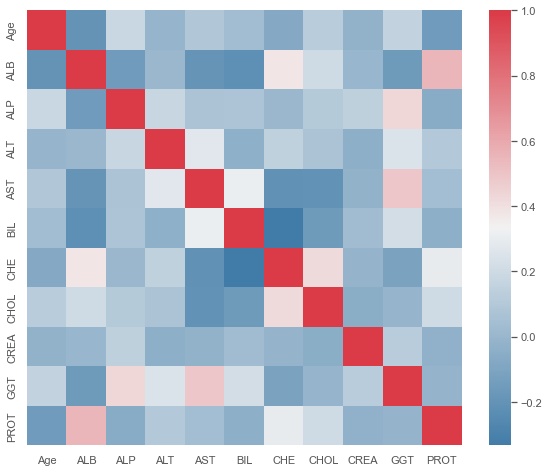

In [347]:
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, ax=ax)

In [348]:
data.corr()['CHOL'].sort_values(ascending=False)

CHOL    1.000000
CHE     0.420163
PROT    0.206545
ALB     0.204769
Age     0.123978
ALP     0.107621
ALT     0.068023
GGT    -0.006828
CREA   -0.047667
BIL    -0.156261
AST    -0.207507
Name: CHOL, dtype: float64

# => boxplot

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age'>

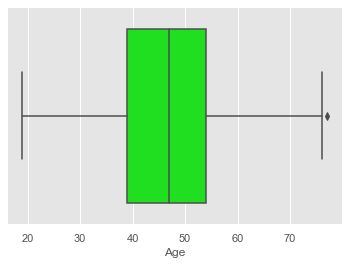

In [349]:
sns.boxplot(data['Age'], color='lime')

=> Histogram

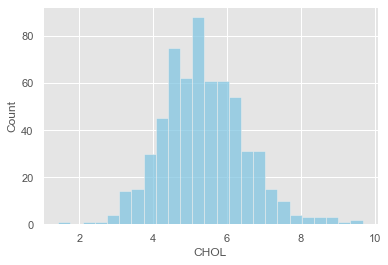

In [350]:
sns.histplot(data['CHOL'],color='c');     # Seaborn visualization

# => Distribution of target

# => Show subplot

In [351]:
# f = plt.figure(figsize=(12,5))

# ax = f.add_subplot(121)
# sns.histplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)  # this plots charges when the value of smoker = 1
# ax.set_title('Distribution of charges for smokers');

# ax = f.add_subplot(122)
# sns.histplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)  # this plots charges when the value of smoker = 0
# ax.set_title('Distribution of charges for non-smokers');

3) If Modeling is required use Labelencoder for target values(if necessary). The rest transform and fit using column transformer

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [353]:
# y = data['Category']

# label_encoder = LabelEncoder()
# true_labels = label_encoder.fit_transform(y)
# data = pd.get_dummies(data, dtype=float)
# data 

In [354]:
# numerical_ix = X.select_dtypes(include=['float64', 'int64']).columns
# categorical_ix = X.select_dtypes(include=['object']).columns

# data_transform = [('cat', OneHotEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
# transform = ColumnTransformer(transformers=data_transform)
# X = transform.fit_transform(X)

In [355]:
# # le = LabelEncoder()
# scaler = StandardScaler()
# le.fit(y)
# y = le.transform(y)
# # y = scaler.fit_transform(np.array(y).reshape(-1, 1)) 

In [356]:
data.head(1)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


Encoding and Assigning a dictionary

In [357]:
data['category_col'] = data['Category']

cat_col = data['category_col']
data = data.drop(columns=['category_col'])
data.insert(loc=1, column='category_col', value=cat_col)

data['new_sex_col'] = data['Sex']

sex_col = data['new_sex_col']
data = data.drop(columns=['new_sex_col'])
data.insert(loc=4, column='new_sex_col', value=sex_col)

In [358]:
category_values = data['category_col']
sex_values = data['new_sex_col']

#Label Encode the Data
le = LabelEncoder()
le.fit(data.category_col)
data.category_col = le.fit_transform(data.category_col)



#Assign a variable for the newly Labelled encoded data
le_category = le.fit_transform(data.category_col)


#Start the Dictionary Transformation process
category_col_dictionary = np.unique(category_values)
le_category_dictionary = np.unique(le_category)

#Assign the dictionary variable
category_dictionary = dict(zip(category_col_dictionary, le_category_dictionary))



#Since Label Encoding only uses one column, repeat this process for other columns

le.fit(data.new_sex_col)
data.new_sex_col = le.fit_transform(data.new_sex_col)
le_sex = le.fit_transform(data.new_sex_col)

sex_col_dictionary = np.unique(sex_values)
le_sex_dictionary = np.unique(le_sex)

sex_dictionary = dict(zip(sex_col_dictionary, le_sex_dictionary))

In [359]:
category_dictionary

{'0=Blood Donor': 0,
 '0s=suspect Blood Donor': 1,
 '1=Hepatitis': 2,
 '2=Fibrosis': 3,
 '3=Cirrhosis': 4}

In [360]:
sex_dictionary

{'f': 0, 'm': 1}

In [361]:
new_data = data.drop(columns=['Category', 'Sex'])
new_data

,category_col,Age,new_sex_col,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,60.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [362]:
x = new_data.drop(['category_col'], axis=1)
y = new_data.category_col

Scale the Data

In [363]:
# scaler = StandardScaler() # Create a scaler object
# # x = scaler.fit_transform(x)
# x = scaler.fit_transform(np.array(x).reshape(-1, 1)) 

# y = scaler.fit_transform(np.array(y).reshape(-1, 1)) 
# x

4. Split the Data

In [364]:
x_train, y_train, x_test, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# STEP 5 - Model Creation

1. Create a Model using either a LinearRegression, Logistic Regression

# => LinearRegression

In [365]:
# Train a linear regression model
linreg = LinearRegression()
linreg.fit(x_train,y_train) # The actual training step
print('3 feature regression training is complete')

ValueError: Found input variables with inconsistent numbers of samples: [492, 123]

# => Logistic Regression

In [ ]:
# logreg = LogisticRegression()
# logreg.fit(x_train, y_train)

# => Random Forest

2. Fit the Data Using PCA if needed

3. Test/Predict the model

4. Evaluate the model using

# =>R-squared

# => Mean Squared error

# => Accuracy Score

# => Confusion Matrix

# STEP 6 - Model Tuning

1. Conduct Model tuning using 

# => K-neighbors

2. Reevaluate the Data

# STEP 7 - Data Presentation

Tell the Data Story